<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(40)

In [ ]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3',
              color='target')
fig.show()

In [ ]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
df.iloc[:,0:3] = Scaler.fit_transform(df.iloc[:,0:3])


In [ ]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [ ]:
# step 3 finding eigen value and eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [ ]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

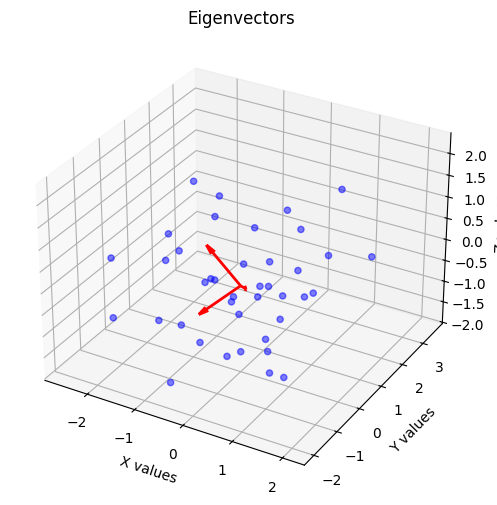

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Compute the mean vector
mean_vector = df[['feature1', 'feature2', 'feature3']].mean().values

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(df[['feature1', 'feature2', 'feature3']].values.T)

# Step 3: Compute eigenvalues & eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Step 4: 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], color='b', alpha=0.5)

# Step 5: Plot eigenvectors (as red arrows)
for i in range(3):  # 3 eigenvectors
    eigen_vector = eigen_vectors[:, i]  # Select i-th eigenvector
    ax.quiver(mean_vector[0], mean_vector[1], mean_vector[2],
              eigen_vector[0], eigen_vector[1], eigen_vector[2],
              color='r', linewidth=2, arrow_length_ratio=0.2)

# Labels and title
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Z values')
ax.set_title('Eigenvectors')

plt.show()


In [ ]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [ ]:
# 40,3 - 3,2 transforming
transformed_df = np.dot(df.iloc[:,0:3],pc.T)

new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [ ]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()